In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import numpy as np

In [82]:
train_dev_data = pd.read_csv('deeploc_combined_data.csv')

In [83]:
len(train_dev_data)

460

In [84]:
train_dev_data.rename(columns={'ID':'ACC'}, inplace=True)

In [85]:
train_dev_data

,ACC,Sequence,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome
0,O75503,MAQEVDTAQGAEMRRGAGAARGRASWCWALALLWLAVVPGWSRVSG...,0,0,0,0,0,0,0,0,1,0,0
1,Q9LHA4,MYGFEALTFNIHGGYLEAIVRGHRAGLLTTADYNNLCQCENLDDIK...,0,0,0,0,0,0,0,0,1,0,0
2,Q9LJI5,MYGFEALTFNIHGGYLEAIVRGHRAGLLTTADYNNLCQCENLDDIK...,0,0,0,0,0,0,0,0,1,0,0
3,Q9SZN1,MGAAENNLEMEGTLEIGMEYRTVSGVAGPLVILEKVKGPKYQEIVN...,0,0,0,0,0,0,0,0,1,0,0
4,P51799,MANVSKKVSWSGRDRDDEEGAPLLRRTGQPDEETPLLNGAGPGARQ...,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,P82971,IIFPGTLWCGNGNLANGTNQLGSWKETDSCCRTHDMCPDLIEAHGS...,0,0,0,1,0,0,0,0,0,0,0
456,B4YSU8,MQKATVLLLALLLLLPLSTAQDAEGSQEDAAQREVDIATRCGGTGD...,0,0,0,1,0,0,0,0,0,0,0
457,B3A0P0,IIECFFSCEIEKDGKSKEGKPCKPKGDKDKDKKCGGWRCKIKMCIKI,0,0,0,1,0,0,0,0,0,0,0
458,P86368,SLLEFGMMILEETGKLAVPFYSSYGCYCGWGGKATPKDATDRCCFV...,0,0,0,1,0,0,0,0,0,0,0


In [86]:
original=pd.read_csv('multisub_5_partitions_unique.csv')

In [87]:
original

,Unnamed: 0,ACC,Kingdom,Partition,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome,Sequence
0,0,Q28165,Metazoa,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
1,1,Q86U42,Metazoa,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
2,2,Q0GA42,Metazoa,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAALGVRLRDCCSRGAVLLLFFSLSPRPPAAAAWLLGLR...
3,3,P82349,Metazoa,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAATEQQGSNGPVKKSMREKAVERRNVNKEHNSNFKAGY...
4,4,Q7L5N1,Metazoa,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAATNGTGGSSGMEVDAAVVPSVMACGVTGSVSVALHPL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28298,28298,Q09712,Fungi,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MYYIGHPSYYRKHIEHVCFQHSGILKKRNYQKNQKKYIMKLNESAM...
28299,28299,Q9V3C5,Metazoa,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,MYYPVGWPKRVGLALPGESASIRHICCDAVKILVAAVGDDFLGIWY...
28300,28300,Q9SQQ9,Viridiplantae,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MYYQNQHQGKNILSSSRMHITSERHPFLRGNSPGDSGLILSTDAKP...
28301,28301,Q9SQQ9-3,Viridiplantae,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MYYQNQHQGKNILSSSRMHITSERHPFLRGNSPGDSGLILSTDAKP...


In [88]:
# Get the values from the column in df2
values_to_remove = original['ACC']

# Filter df1 based on values in df2's column 'A'
filtered_df = train_dev_data [~train_dev_data ['ACC'].isin(values_to_remove)]

In [89]:
filtered_df.reset_index(inplace=True, drop=True)

In [90]:
len(filtered_df)

436

In [91]:
filtered_df

,ACC,Sequence,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome
0,O75503,MAQEVDTAQGAEMRRGAGAARGRASWCWALALLWLAVVPGWSRVSG...,0,0,0,0,0,0,0,0,1,0,0
1,Q9LHA4,MYGFEALTFNIHGGYLEAIVRGHRAGLLTTADYNNLCQCENLDDIK...,0,0,0,0,0,0,0,0,1,0,0
2,Q9LJI5,MYGFEALTFNIHGGYLEAIVRGHRAGLLTTADYNNLCQCENLDDIK...,0,0,0,0,0,0,0,0,1,0,0
3,Q9SZN1,MGAAENNLEMEGTLEIGMEYRTVSGVAGPLVILEKVKGPKYQEIVN...,0,0,0,0,0,0,0,0,1,0,0
4,P51799,MANVSKKVSWSGRDRDDEEGAPLLRRTGQPDEETPLLNGAGPGARQ...,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,P82971,IIFPGTLWCGNGNLANGTNQLGSWKETDSCCRTHDMCPDLIEAHGS...,0,0,0,1,0,0,0,0,0,0,0
432,B4YSU8,MQKATVLLLALLLLLPLSTAQDAEGSQEDAAQREVDIATRCGGTGD...,0,0,0,1,0,0,0,0,0,0,0
433,B3A0P0,IIECFFSCEIEKDGKSKEGKPCKPKGDKDKDKKCGGWRCKIKMCIKI,0,0,0,1,0,0,0,0,0,0,0
434,P86368,SLLEFGMMILEETGKLAVPFYSSYGCYCGWGGKATPKDATDRCCFV...,0,0,0,1,0,0,0,0,0,0,0


In [92]:
def plot_label1_percentage(dataframe, selected_columns):
    """
    Plots the percentage of label 1 in each selected column of the DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - selected_columns (list): List of column names to analyze.

    Returns:
    - None (plots the result using matplotlib)
    """

    # Check if selected columns exist in the DataFrame
    invalid_columns = [col for col in selected_columns if col not in dataframe.columns]
    if invalid_columns:
        print(f"Invalid columns: {invalid_columns}")
        return

    # Initialize a plot
    plt.figure(figsize=(20,13))

    # Plot the percentage of label 1 for each selected column
    for col in selected_columns:
        label_counts = dataframe[col].value_counts(normalize=True)
        if 1 in label_counts.index:
            label1_percentage = label_counts[1] * 100
            plt.bar(col, label1_percentage, label=f'{col} - Label 1')

    # Add labels and title
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Label 1')
    plt.title('Percentage of Label 1 in Selected Columns')
    plt.legend()

    # Show the plot
    plt.show()

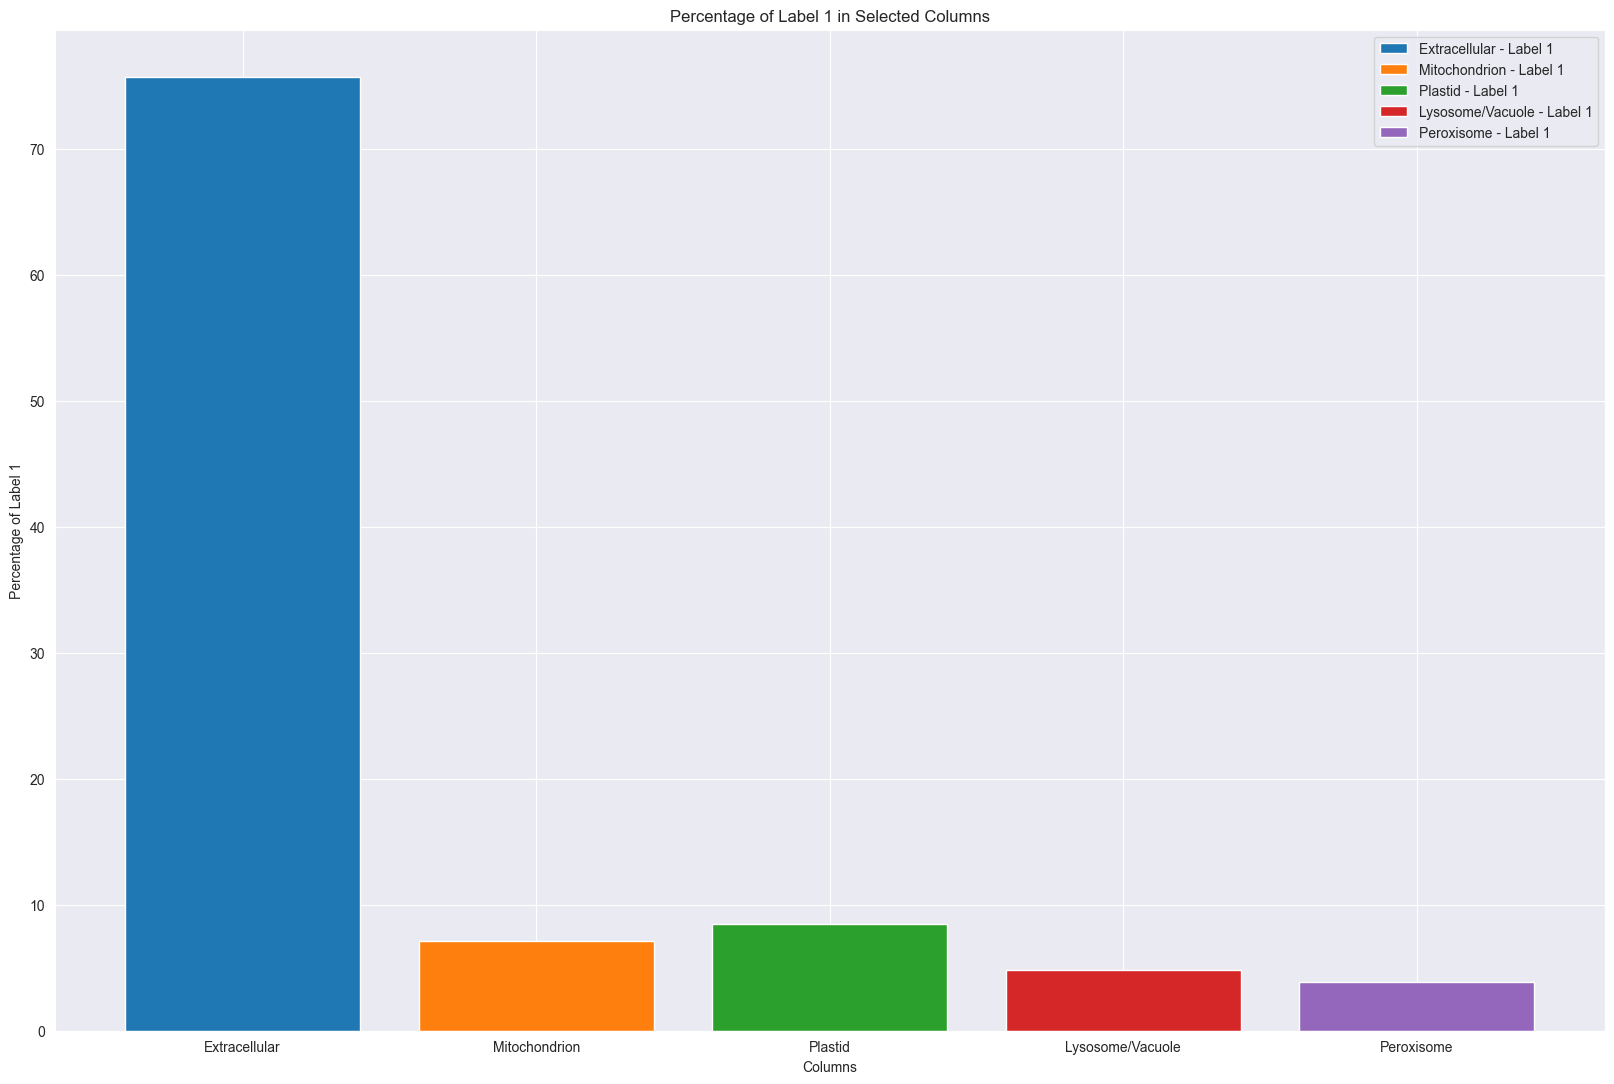

In [93]:
plot_label1_percentage(filtered_df, ['Membrane', 'Cytoplasm', 'Nucleus', 'Extracellular', 'Cell membrane', 'Mitochondrion', 'Plastid', 'Endoplasmic reticulum', 'Lysosome/Vacuole', 'Golgi apparatus', 'Peroxisome'])

In [94]:
filtered_df

,ACC,Sequence,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome
0,O75503,MAQEVDTAQGAEMRRGAGAARGRASWCWALALLWLAVVPGWSRVSG...,0,0,0,0,0,0,0,0,1,0,0
1,Q9LHA4,MYGFEALTFNIHGGYLEAIVRGHRAGLLTTADYNNLCQCENLDDIK...,0,0,0,0,0,0,0,0,1,0,0
2,Q9LJI5,MYGFEALTFNIHGGYLEAIVRGHRAGLLTTADYNNLCQCENLDDIK...,0,0,0,0,0,0,0,0,1,0,0
3,Q9SZN1,MGAAENNLEMEGTLEIGMEYRTVSGVAGPLVILEKVKGPKYQEIVN...,0,0,0,0,0,0,0,0,1,0,0
4,P51799,MANVSKKVSWSGRDRDDEEGAPLLRRTGQPDEETPLLNGAGPGARQ...,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,P82971,IIFPGTLWCGNGNLANGTNQLGSWKETDSCCRTHDMCPDLIEAHGS...,0,0,0,1,0,0,0,0,0,0,0
432,B4YSU8,MQKATVLLLALLLLLPLSTAQDAEGSQEDAAQREVDIATRCGGTGD...,0,0,0,1,0,0,0,0,0,0,0
433,B3A0P0,IIECFFSCEIEKDGKSKEGKPCKPKGDKDKDKKCGGWRCKIKMCIKI,0,0,0,1,0,0,0,0,0,0,0
434,P86368,SLLEFGMMILEETGKLAVPFYSSYGCYCGWGGKATPKDATDRCCFV...,0,0,0,1,0,0,0,0,0,0,0


In [95]:
import pandas as pd
from sklearn.model_selection import KFold

# Assuming you have a DataFrame named 'data' with your dataset
# Let's say 'data' contains your features and labels

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Add a new column to store the fold number
filtered_df['Partition'] = -1

# Assign fold numbers to each row
for fold_number, (train_index, test_index) in enumerate(kf.split(filtered_df)):
    print(train_index, test_index)
    filtered_df.loc[test_index, 'Partition'] = fold_number

# Displaying the updated DataFrame with fold numbers
print(filtered_df)


[  1   2   3   4   5   6   7   8  10  11  12  13  14  16  18  20  21  23
  26  27  28  29  31  32  34  35  36  37  38  40  41  43  44  45  47  48
  49  50  51  52  53  54  58  59  60  61  62  63  64  65  67  68  69  71
  74  80  81  83  84  85  86  87  88  89  91  92  94  95  96  97  98  99
 100 102 103 105 106 107 108 109 110 111 112 114 115 117 118 119 120 121
 122 123 125 127 128 129 130 133 134 135 136 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 156 158 159 160 161 162 163 164 166 167
 168 169 170 171 172 173 174 176 177 178 179 180 182 183 184 185 186 187
 188 189 190 191 193 194 195 196 197 198 199 200 201 202 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 219 221 222 223 224 226 227 228
 229 230 231 232 233 235 236 237 238 239 240 241 242 243 244 246 247 248
 249 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 279 281 282 285 286 288 292 293
 294 295 296 297 298 299 300 301 303 306 308 309 31

C:\Users\wadkr\AppData\Local\Temp\ipykernel_32596\3559374950.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Partition'] = -1


In [96]:
filtered_df['Kingdom'] = pd.NA

C:\Users\wadkr\AppData\Local\Temp\ipykernel_32596\2864204521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Kingdom'] = pd.NA


In [97]:
filtered_df.to_csv('deeploc_combined_data_with_partition.csv', index=False)